importing libraries and Reading Data

In [106]:
import numpy as np 
import pandas as pd
import plotly.express as px

In [107]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [109]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [110]:
df.head(1).T

,0
Patient ID,BMW7812
Age,67
Sex,Male
Cholesterol,208
Blood Pressure,158/88
Heart Rate,72
Diabetes,0
Family History,0
Smoking,1
Obesity,0


In [111]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

Doing some Cleaning⚒️

In [112]:
df['Alcohol Consumption'] = df['Alcohol Consumption'].astype('bool')
df['Smoking'] = df['Smoking'].astype('bool')
df['Obesity'] = df['Obesity'].astype('bool')
df['Previous Heart Problems'] = df['Previous Heart Problems'].astype('bool')
df['Medication Use'] = df['Medication Use'].astype('bool')
df['Heart Attack Risk'] = df['Heart Attack Risk'].astype('bool')
df['Diabetes'] = df['Diabetes'].astype('bool')
df['Family History'] = df['Family History'].astype('bool')


In [113]:
df['Alcohol Consumption'].head()

0    False
1     True
2    False
3     True
4    False
Name: Alcohol Consumption, dtype: bool

In [114]:
def grouping(data):
    if data >0 and data <15:
        return 'Kids'
    elif data >= 15 and data < 40:
        return 'Youth'
    elif data >=40 and data <=60:
        return 'Elderly'
    else:
        return 'Old' 

In [115]:
df['Age groups'] = df['Age'].apply(grouping)

In [116]:
def grouping_stress(data):
    if data >0 and data <4:
        return 'low'
    elif data >= 4 and data < 7:
        return 'medium'
    else:
        return 'High'
     

In [117]:
df['Stress Level Cats'] = df['Stress Level'].apply(grouping_stress)
df['Stress Level Cats'].value_counts()

Stress Level Cats
High      3492
low       2646
medium    2625
Name: count, dtype: int64

In [118]:
df.sample()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Age groups,Stress Level Cats
8412,LAN8677,72,Male,380,144/92,90,False,False,True,False,...,19.456495,418,2,5,New Zealand,Australia,Southern Hemisphere,True,Old,low


In [119]:
df['systolic pressure'] = df['Blood Pressure'].str.split('/').str[0].astype('int')

In [120]:
df['diastolic pressure'] = df['Blood Pressure'].str.split('/').str[1].astype('int')

In [121]:
# write a function to categorize blood pressure
def blood_pressure(data):
    if data < 120:
        return 'Normal'
    elif data >= 120 and data < 129:
        return 'Elevated'
    elif data >= 130 and data < 139:
        return 'Stage 1'
    elif data >= 140 and data < 180:
        return 'Stage 2'
    else:
        return 'Hypertensive'

df['blood cats'] = df['systolic pressure'].apply(blood_pressure)

In [122]:
df.describe(include='O')

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere,Age groups,Stress Level Cats,blood cats
count,8763,8763,8763,8763,8763,8763,8763,8763,8763,8763
unique,8763,2,3915,3,20,6,2,3,3,5
top,BMW7812,Male,146/94,Healthy,Germany,Asia,Northern Hemisphere,Old,High,Stage 2
freq,1,6111,8,2960,477,2543,5660,3554,3492,3890


Lets's go with EDA 🤯🤯🤯🤯🤯

In [123]:
df.groupby('Age groups')['Cholesterol'].mean()

Age groups
Elderly    259.687349
Old        259.086663
Youth      261.080308
Name: Cholesterol, dtype: float64

In [124]:
df[df['Alcohol Consumption'] == True    ].groupby('Age groups')['Heart Attack Risk'].sum()

Age groups
Elderly    518
Old        762
Youth      569
Name: Heart Attack Risk, dtype: int64

In [125]:
#filter with more than one condition
df[(df['Smoking'] == True) & (df['Alcohol Consumption'] == True)].groupby('Age groups')['Heart Attack Risk'].mean()

Age groups
Elderly    0.349760
Old        0.360113
Youth      0.346491
Name: Heart Attack Risk, dtype: float64

In [126]:
df.groupby('Smoking')['Heart Attack Risk'].mean()

Smoking
False    0.363938
True     0.357552
Name: Heart Attack Risk, dtype: float64

In [127]:
df[df['Heart Attack Risk'] == True].groupby('Smoking')['Heart Attack Risk'].count()

Smoking
False     329
True     2810
Name: Heart Attack Risk, dtype: int64

In [128]:
df[df['Heart Attack Risk'] == True].groupby('Obesity')['Heart Attack Risk'].count()

Obesity
False    1593
True     1546
Name: Heart Attack Risk, dtype: int64

In [129]:
df[df['Heart Attack Risk']==True].groupby('Continent')['Heart Attack Risk'].sum()

Continent
Africa           322
Asia             900
Australia        319
Europe           775
North America    324
South America    499
Name: Heart Attack Risk, dtype: int64

In [130]:
df.groupby('Continent')['Heart Attack Risk'].mean()

Continent
Africa           0.368843
Asia             0.353913
Australia        0.360860
Europe           0.345828
North America    0.376744
South America    0.366373
Name: Heart Attack Risk, dtype: float64

In [131]:
df[df['Heart Attack Risk']==True].groupby('Hemisphere')['Heart Attack Risk'].count()

Hemisphere
Northern Hemisphere    2053
Southern Hemisphere    1086
Name: Heart Attack Risk, dtype: int64

In [132]:
df.groupby('Hemisphere')['Heart Attack Risk'].count(
    
)

Hemisphere
Northern Hemisphere    5660
Southern Hemisphere    3103
Name: Heart Attack Risk, dtype: int64

In [133]:
df[df['Heart Attack Risk']==True].groupby(['Age groups','Smoking'])['Heart Attack Risk'].count()

Age groups  Smoking
Elderly     False        13
            True        859
Old         True       1291
Youth       False       316
            True        660
Name: Heart Attack Risk, dtype: int64

In [134]:
df[df['Heart Attack Risk']==True].groupby('Obesity')['Cholesterol'].mean()

Obesity
False    262.634652
True     261.285899
Name: Cholesterol, dtype: float64

In [135]:
df[df['Heart Attack Risk']==True].groupby('Diabetes')['Cholesterol'].mean()

Diabetes
False    264.220435
True     260.828050
Name: Cholesterol, dtype: float64

It's time to visualize Data📊

In [136]:
x = df[df['Heart Attack Risk']== True].groupby(['Diabetes','Smoking'])['Cholesterol'].mean().reset_index()
x.head()

,Diabetes,Smoking,Cholesterol
0,False,False,265.151515
1,False,True,264.124217
2,True,False,254.173913
3,True,True,261.654428


In [137]:
px.histogram(x,x='Smoking',y='Cholesterol',color='Diabetes',barmode='group',histfunc='avg',color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark')

In [138]:
df.groupby('Diet')['Cholesterol'].mean()

Diet
Average      260.117788
Healthy      258.706081
Unhealthy    260.833967
Name: Cholesterol, dtype: float64

<Axes: ylabel='Cholesterol'>

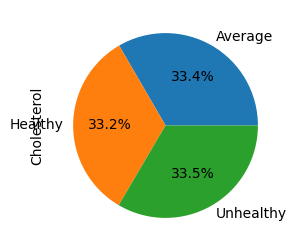

In [139]:
df.groupby('Diet')['Cholesterol'].mean().plot(kind='pie',autopct='%1.1f%%',figsize=(5,3))

In [140]:
df.groupby('Previous Heart Problems')['Heart Attack Risk'].mean()

Previous Heart Problems
False    0.358081
True     0.358343
Name: Heart Attack Risk, dtype: float64

In [141]:
df[df['Heart Attack Risk']==True].groupby('Previous Heart Problems')['Heart Attack Risk'].count()

Previous Heart Problems
False    1582
True     1557
Name: Heart Attack Risk, dtype: int64

In [142]:
df[df['Heart Attack Risk']==True].groupby('blood cats')['Heart Attack Risk'].mean().sort_values(ascending=False).reset_index()

,blood cats,Heart Attack Risk
0,Elevated,1.0
1,Hypertensive,1.0
2,Normal,1.0
3,Stage 1,1.0
4,Stage 2,1.0


<Axes: >

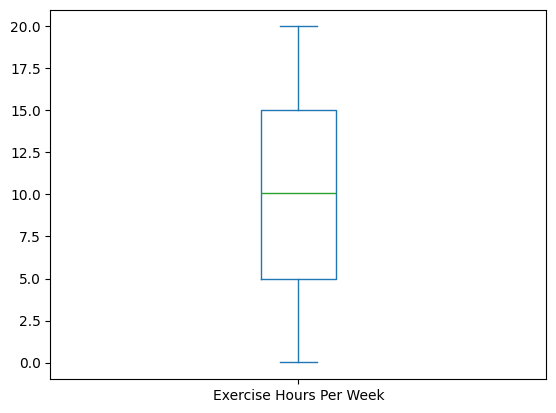

In [143]:
df['Exercise Hours Per Week'].plot(kind='box')

In [144]:
df['Exercise Hours Per Week'].max()

19.998709051535457

In [145]:
df['Exercise Hours Per Week'].min()

0.0024423483189783

In [146]:
df['Exercise Hours Per Week'].describe()

count    8763.000000
mean       10.014284
std         5.783745
min         0.002442
25%         4.981579
50%        10.069559
75%        15.050018
max        19.998709
Name: Exercise Hours Per Week, dtype: float64

In [147]:
def Exercise_hours(x):
    if x<5:
        return 'Low'
    elif x<10:
        return 'Medium'
    elif x<15:
        return 'High'
    else:
        return 'Very High'

df['Exercise_Cats'] = df['Exercise Hours Per Week'].apply(Exercise_hours)

In [148]:
df.sample(3).T

,5181,3826,4594
Patient ID,HCW3172,MUK6743,NTG8006
Age,66,51,29
Sex,Male,Male,Male
Cholesterol,137,332,166
Blood Pressure,130/106,142/101,134/78
Heart Rate,80,57,92
Diabetes,True,False,True
Family History,True,False,False
Smoking,True,True,True
Obesity,True,False,False


In [149]:
l = df[df['Medication Use']==True].groupby('Age groups')['Heart Attack Risk'].mean().sort_values(ascending=False).reset_index()

In [150]:
px.bar(l,x='Age groups',y='Heart Attack Risk',color='Age groups',title='Heart Attack Risk by Age with Family History',color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark')

In [151]:
df[df['Diabetes']==True].groupby('Exercise_Cats')['Heart Attack Risk'].mean().sort_values(ascending=False).reset_index()

,Exercise_Cats,Heart Attack Risk
0,High,0.376050
1,Very High,0.373793
2,Medium,0.355120
3,Low,0.351814


In [152]:
df[df['Previous Heart Problems']==True][['Diabetes','Heart Attack Risk']].corr()

,Diabetes,Heart Attack Risk
Diabetes,1.000000,0.017883
Heart Attack Risk,0.017883,1.000000


In [153]:
previous_attack = df[df['Previous Heart Problems']==True].groupby('Diabetes')['Heart Attack Risk'].mean().sort_values(ascending=False).reset_index()

In [154]:
px.bar(previous_attack,x='Diabetes',y='Heart Attack Risk',color='Diabetes',color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark')

In [155]:
previous = df[df['Previous Heart Problems']==True]

In [156]:
Dieto = df[df['Previous Heart Problems']==True].groupby('Diet',)['Heart Attack Risk'].mean().sort_values(ascending=False).reset_index()

In [157]:
px.bar(Dieto,x='Diet',y='Heart Attack Risk',color='Diet',title='Diet vs. Heart Attack Risk (had previous heart problems)',color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark')

In [158]:
blood_cats = df.groupby('blood cats')['Heart Attack Risk'].mean().sort_values(ascending=False).reset_index()

In [159]:
px.pie(blood_cats,values='Heart Attack Risk',names='blood cats',color='blood cats',hole=0.5,color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark')

In [160]:
Age_groups = df.groupby('Age groups')['Heart Attack Risk'].mean().sort_values(ascending=False).reset_index()

In [161]:
Age_GR = df[df['Heart Attack Risk']==True].groupby('Age groups')['Heart Attack Risk'].count().reset_index()

In [162]:
px.pie(Age_GR,values='Heart Attack Risk',names='Age groups',color='Age groups',hole=0.5,color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark')

In [163]:
df[df['Heart Attack Risk']==True].groupby('Exercise_Cats') ['Heart Attack Risk'].count().sort_values(ascending=False).reset_index()

,Exercise_Cats,Heart Attack Risk
0,High,815
1,Very High,803
2,Low,783
3,Medium,738


In [164]:
df.groupby('Exercise_Cats') ['Obesity'].sum().sort_values(ascending=False).reset_index()

,Exercise_Cats,Obesity
0,Medium,1125
1,Very High,1114
2,High,1085
3,Low,1070


In [165]:
df.groupby('Country')['Exercise Hours Per Week'].mean().sort_values(ascending=False)

Country
Nigeria           10.379758
Germany           10.282100
New Zealand       10.270017
Italy             10.128015
United States     10.126582
China             10.111547
India             10.109792
Brazil            10.103227
Canada            10.087519
Vietnam           10.082092
South Africa      10.039167
United Kingdom    10.035726
France             9.993267
South Korea        9.964298
Colombia           9.873642
Argentina          9.861363
Japan              9.854477
Spain              9.827966
Thailand           9.662722
Australia          9.477059
Name: Exercise Hours Per Week, dtype: float64

In [166]:
df.groupby('Country')['Heart Attack Risk'].mean().sort_values(ascending=False)

Country
South Korea       0.398533
Nigeria           0.397321
United States     0.395238
Colombia          0.377622
Thailand          0.376168
Australia         0.374165
Argentina         0.369427
Germany           0.360587
Canada            0.359091
China             0.355505
Brazil            0.352814
France            0.352018
United Kingdom    0.350109
Spain             0.348837
Vietnam           0.348235
New Zealand       0.347126
South Africa      0.338824
Japan             0.332564
Italy             0.315545
India             0.313107
Name: Heart Attack Risk, dtype: float64

In [167]:
df.groupby('Country')['Smoking'].mean().nlargest(1).reset_index()

,Country,Smoking
0,South Africa,0.912941


In [168]:
df.groupby('Country')['Smoking'].mean().nsmallest(1).reset_index()

,Country,Smoking
0,Canada,0.872727


In [169]:
smoking = df.groupby('Country')['Smoking'].mean().reset_index()

In [170]:
px.histogram(smoking,x='Country',y='Smoking',color = 'Country',text_auto='.4f',color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark',title='Smoking vs. Country')

In [171]:
TR = df.groupby('Country')['Triglycerides'].mean().nlargest(8).reset_index()

In [172]:
px.histogram(TR,x='Country',y='Triglycerides',color = 'Country',text_auto='.4f',color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark',title='Triglycerides vs. Country')

In [173]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Age groups',
       'Stress Level Cats', 'systolic pressure', 'diastolic pressure',
       'blood cats', 'Exercise_Cats'],
      dtype='object')

In [174]:
px.funnel(df,x='Continent',y='Heart Attack Risk',color='Country',title='Continent vs. Heart Attack Risk',hover_name='Country',width=800,height=600,color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark')

In [175]:
x = df.groupby(['Stress Level','Sex'])['Heart Attack Risk'].mean().reset_index()

In [176]:
u = df.groupby(['Stress Level','Previous Heart Problems'])['Heart Attack Risk'].mean().reset_index()

In [177]:
px.line(u,x='Stress Level',y='Heart Attack Risk',color='Previous Heart Problems',color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark',title='Stress Level vs. Heart Attack Risk')

In [178]:
px.line(x,x='Stress Level',y='Heart Attack Risk',color='Sex',color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark',title='Stress Level vs. Heart Attack Risk')

In [179]:
m = df.groupby(['Stress Level','Diabetes'])['Heart Attack Risk'].mean().reset_index()

In [180]:
px.line(m,x='Stress Level',y='Heart Attack Risk',color='Diabetes',color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark',title='Stress Level vs. Heart Attack Risk')

In [181]:
o = df.groupby(['Stress Level','blood cats'])['Heart Attack Risk'].mean().reset_index()

In [182]:
px.line(o,x='Stress Level',y='Heart Attack Risk',color='blood cats',color_discrete_sequence=px.colors.qualitative.Set3_r,template='plotly_dark',title='Stress Level vs. Heart Attack Risk')

In [183]:
df.groupby('Heart Attack Risk')['BMI'].mean().sort_values(ascending=False).reset_index()

,Heart Attack Risk,BMI
0,True,28.891617
1,False,28.891350


In [184]:
df.groupby('Diet')['Heart Attack Risk'].mean().sort_values(ascending=False).reset_index()

,Diet,Heart Attack Risk
0,Healthy,0.364527
1,Unhealthy,0.357662
2,Average,0.352335


In [185]:
df[df['Heart Attack Risk']==True].groupby('Diet')['Heart Attack Risk'].count().sort_values(ascending=False).reset_index()

,Diet,Heart Attack Risk
0,Healthy,1079
1,Unhealthy,1034
2,Average,1026


In [186]:
y = df[df['Previous Heart Problems'] == True].groupby('Alcohol Consumption')['Heart Attack Risk'].count().sort_values(ascending=False).reset_index()

In [187]:
px.bar(y,x='Heart Attack Risk',y='Alcohol Consumption',title='Smoking vs. Heart Attack Risk(had previous heart problems)',color='Alcohol Consumption',color_discrete_sequence=px.colors.qualitative.Set3_r)

In [188]:
z = df[df['Family History'] == True].groupby('Smoking')['Heart Attack Risk'].count().sort_values(ascending=False).reset_index()

In [189]:
px.bar(z,x='Heart Attack Risk',y='Smoking',title='Smoking vs. Heart Attack Risk(had family history)',color='Smoking',color_discrete_sequence=px.colors.qualitative.Set3_r)

In [190]:
Triglycerides =  df.groupby('Heart Attack Risk')['Triglycerides'].mean().reset_index()

In [191]:
px.pie(Triglycerides,names='Heart Attack Risk',values='Triglycerides',title='Heart Attack Risk vs. Triglycerides',color='Heart Attack Risk',hole=0.5,color_discrete_sequence=px.colors.qualitative.Set3_r)

In [192]:
df.groupby('Heart Attack Risk')['Sleep Hours Per Day'].mean().reset_index()

,Heart Attack Risk,Sleep Hours Per Day
0,False,7.051031
1,True,6.974196


In [193]:
df.pivot_table(index='Sex',columns='Heart Attack Risk',values='Sleep Hours Per Day',aggfunc='mean')

Heart Attack Risk,False,True
Sex,,
Female,7.059719,7.003178
Male,7.047242,6.961731


In [194]:
df.pivot_table(index='Sex',columns='Heart Attack Risk',values='Exercise Hours Per Week',aggfunc='mean',margins=True)

Heart Attack Risk,False,True,All
Sex,,,
Female,10.160031,9.922636,10.075528
Male,9.881632,10.176945,9.987705
All,9.966182,10.100466,10.014284


In [195]:
z = df.pivot_table(index='Age groups',columns='Smoking',values='Heart Attack Risk',aggfunc='mean')

In [196]:
px.bar(z)

In [197]:
df.pivot_table(index='Age groups',columns='Alcohol Consumption',values='Heart Attack Risk',aggfunc='mean')

Alcohol Consumption,False,True
Age groups,,
Elderly,0.355065,0.348822
Old,0.367872,0.360113
Youth,0.374425,0.346951


In [198]:
df.groupby('Age groups')['Heart Attack Risk'].mean()

Age groups
Elderly    0.351330
Old        0.363253
Youth      0.357902
Name: Heart Attack Risk, dtype: float64

In [199]:
df.groupby(['Diabetes','Smoking','Alcohol Consumption'])['Heart Attack Risk'].mean().reset_index()

,Diabetes,Smoking,Alcohol Consumption,Heart Attack Risk
0,False,False,False,0.377778
1,False,False,True,0.266667
2,False,True,False,0.364214
3,False,True,True,0.341508
4,True,False,False,0.395918
5,True,False,True,0.386628
6,True,True,False,0.363057
7,True,True,True,0.360013


In [200]:
df.groupby(['Family History','Previous Heart Problems','Stress Level'])['Heart Attack Risk'].mean().sort_values(ascending=False).head(6).reset_index()

,Family History,Previous Heart Problems,Stress Level,Heart Attack Risk
0,False,True,7,0.418269
1,False,False,8,0.404651
2,False,True,5,0.402597
3,True,True,6,0.399038
4,True,True,2,0.392241
5,False,True,6,0.388626


In [201]:
df.groupby(['Family History','Previous Heart Problems','blood cats'])['Heart Attack Risk'].mean().sort_values(ascending=False).head(6).reset_index()

,Family History,Previous Heart Problems,blood cats,Heart Attack Risk
0,True,True,Hypertensive,0.434783
1,False,True,Elevated,0.413333
2,True,True,Stage 1,0.409091
3,True,False,Hypertensive,0.400000
4,False,False,Stage 2,0.392578
5,False,False,Hypertensive,0.378788


In [202]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Age groups',
       'Stress Level Cats', 'systolic pressure', 'diastolic pressure',
       'blood cats', 'Exercise_Cats'],
      dtype='object')

In [203]:
df.groupby(['Diet','Smoking','Alcohol Consumption'])['Heart Attack Risk'].mean().sort_values(ascending=False).reset_index()

,Diet,Smoking,Alcohol Consumption,Heart Attack Risk
0,Healthy,False,False,0.421875
1,Average,False,False,0.375000
2,Unhealthy,False,False,0.371212
3,Healthy,False,True,0.370787
4,Healthy,True,False,0.368571
5,Unhealthy,True,False,0.362584
6,Average,True,False,0.359242
7,Unhealthy,True,True,0.357977
8,Healthy,True,True,0.356608
9,Average,False,True,0.349398


In [204]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Country,Continent,Hemisphere,Heart Attack Risk,Age groups,Stress Level Cats,systolic pressure,diastolic pressure,blood cats,Exercise_Cats
0,BMW7812,67,Male,208,158/88,72,False,False,True,False,...,Argentina,South America,Southern Hemisphere,False,Old,High,158,88,Stage 2,Low
1,CZE1114,21,Male,389,165/93,98,True,True,True,True,...,Canada,North America,Northern Hemisphere,False,Youth,low,165,93,Stage 2,Low
2,BNI9906,21,Female,324,174/99,72,True,False,False,False,...,France,Europe,Northern Hemisphere,False,Youth,High,174,99,Stage 2,Low
3,JLN3497,84,Male,383,163/100,73,True,True,True,False,...,Canada,North America,Northern Hemisphere,False,Old,High,163,100,Stage 2,Medium
4,GFO8847,66,Male,318,91/88,93,True,True,True,True,...,Thailand,Asia,Northern Hemisphere,False,Old,medium,91,88,Normal,Medium


In [205]:
df_cleaned = df.copy()

In [206]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   bool   
 7   Family History                   8763 non-null   bool   
 8   Smoking                          8763 non-null   bool   
 9   Obesity                          8763 non-null   bool   
 10  Alcohol Consumption              8763 non-null   bool   
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [207]:
df_cleaned.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Age groups',
       'Stress Level Cats', 'systolic pressure', 'diastolic pressure',
       'blood cats', 'Exercise_Cats'],
      dtype='object')

In [208]:
df_cleaned.drop(['Patient ID', 'Blood Pressure'],axis=1,inplace=True)

In [210]:
df_cleaned.to_csv('df_cleaned.csv',index=False)

And now it's time to start streamlit work 🕸️

See you there .py 👋